## 啦啦隊與棒球輿情分析   
課程 : 社群媒體分析  
授課教授：黃三益  
組別: 媽的多重宇宙  
組員: 蔡秉祐、林冠杰、林憲聰、王唯宇  

## 大綱
1. 動機與分析目標  
2. 資料集說明  
3. 資料分析過程與結果說明  
4. 結論  

## 1. 動機與分析目標
<div style="display:flex;justify-content:center;margin-bottom:20px">
  <img src="img/李雅英.png" alt="image1" width="279" height="427" style="margin-right:20px">
  <img src="img/李多慧.png" alt="image2" width="279" height="427">
</div>
動機 :  
我們想要分析「台灣啦啦隊的聲量和輿情分析」，是源自與觀察到幾個台灣球場的趨勢。首先，最近台灣啦啦隊引進了越來越多來自韓國等地的外援隊員，包括前樂天啦啦隊隊員李多慧、富邦Angels韓籍外援李雅英，這引起了人們對啦啦隊國際化的興趣和討論，讓我們好奇，進入球場的觀賽球迷的是否因為啦啦隊，導致行為和態度是否有所變化？啦啦隊的加入對於比賽的參與感、娛樂性與棒球文化究竟是帶來益處還是害處？最後，我們希望找出啦啦隊對台灣棒球成功的關鍵因素，不僅僅是在於視覺效果，還包括在觀眾互動、團隊凝聚力等方面的作用。 

分析目標 ：
1. 啦啦隊的情緒分析，分析大家對於啦啦隊正負向情緒與討論原因，需要也可以針對韓國外援進行分析
2. 啦啦隊字詞的相關性分析，分析與啦啦隊會共同出現的字詞有哪些
3. 不同球團的啦啦隊聲勢分析，也可以進一步分析每個球團中，對於球隊與啦啦隊的關注程度差異(什麼是球團？什麼是拉拉隊)
4. 找一些台灣報求特殊時段的資料，如[2023三月的經典賽、2023十月的總冠軍賽]，來分析大家對這段時間討論的主題 



In [3]:
import pandas as pd
import jieba
from matplotlib import font_manager
import matplotlib.pyplot as plt
import jieba.analyse
from wordcloud import WordCloud 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [24]:
# Path to the custom font
font_path = 'font/TraditionalChinese.ttf'

# Add the custom font to the font manager
font_manager.fontManager.addfont(font_path)

# After adding the font, search for it by filename to get the correct font name
for font in font_manager.fontManager.ttflist:
    if font.fname == font_path:
        print(f"Found font: {font.name}")
        plt.rcParams['font.family'] = font.name
        break

Found font: Noto Sans TC


## 2. 資料集說明
使用各新聞運動版，有中時、自由時報、東森新聞、聯合新聞、蘋果日報，預期從tarflow下載2023/04/21~2024/04/21一年的新聞 

In [5]:
中時 = pd.read_csv('data/中時新聞.csv')
自由 = pd.read_csv('data/自由時報.csv')
東森 = pd.read_csv('data/東森新聞.csv')
聯合 = pd.read_csv('data/聯合新聞.csv')
蘋果 = pd.read_csv('data/蘋果日報.csv')

In [6]:
print(len(中時),len(自由),len(東森),len(聯合),len(蘋果))


8469 17178 1505 19937 4117


資料筆數上，聯合(19937)最多，其次是自由(17178)，最少是東森(1505)

In [7]:
中時.head()

,dataSource,artUrl,artDate,artTitle,artContent
0,chinatimes,https://www.chinatimes.com/realtimenews/202401...,2023/12/31 23:01,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...
1,chinatimes,https://www.chinatimes.com/realtimenews/202312...,2023/12/31 2:12,計畫退役梅西10號球衣 阿根廷足協：這是我們能為他做的,Argentina plan to retire the number 10 after L...
2,chinatimes,https://www.chinatimes.com/realtimenews/202312...,2023/12/31 9:48,運動選手世界盃奪牌卻領禮券 苗栗縣議員請命頒獎金,苗栗縣有高三生今年遠征歐洲參加「義大利世界盃滑輪溜冰錦標賽」，獲得銀牌佳績，但卻未獲縣府獎勵...
3,chinatimes,https://www.chinatimes.com/realtimenews/202312...,2023/12/31 9:45,新北體育局明掛牌 體育處長洪玉玲代理首任局長,新北市體育局明年元旦將揭牌成立，因選前人事凍結，局長仍懸缺，由現任新北市體育處長洪玉玲代理首...
4,chinatimes,https://www.chinatimes.com/realtimenews/202312...,2023/12/31 1:12,MLB》大谷翔平離開後誰稱霸美聯？ 2屆全明星獲讚最全面打者,大谷翔平再度以全票姿態摘得年度MVP，不過明年他將轉戰國聯隊伍道奇，等同美聯MVP的競爭者少...


In [8]:
自由.head()

,system_id,dataSource,artUrl,artDate,artTitle,artContent,sub_media
0,1,ltn,https://sports.ltn.com.tw/news/paper/1623670,2023-12-31 21:30:00,日棒壇10大新聞 前2名都有大谷,大谷翔平2獲美聯年度MVP並勇奪大聯盟全壘打王事件，佔居日本2023年度棒球十大新聞的第2名...,sports
1,2,ltn,https://sports.ltn.com.tw/news/paper/1623668,2023-12-31 21:30:00,日籍教頭特效藥？百勝僅4人,中職日籍教頭勝場前10名〔記者龔乃玠／綜合報導〕古久保健二、平野惠一先後接任樂天桃猿和中信兄...,sports
2,3,ltn,https://sports.ltn.com.tw/news/paper/1623680,2023-12-31 21:30:00,60籃板超「勇」 宰國王復仇,勇士洋將辛特力猛攻29分。（記者林正堃攝）〔記者林岳甫／台北報導〕近況都不佳的富邦勇士、新北...,sports
3,4,ltn,https://sports.ltn.com.tw/news/paper/1623667,2023-12-31 21:30:00,教頭換了一半 中職改吹東洋風,樂天桃猿新球季將由日籍教頭古久保健二掌兵符。（資料照）〔記者林宥辰／台北報導〕隨著富邦悍將宣...,sports
4,5,ltn,https://sports.ltn.com.tw/news/paper/1623685,2023-12-31 21:30:00,蠻牛重返戰場 喬帥同日出擊,納達爾（法新社）〔記者梁偉銘／綜合報導〕 睽違1年，「三巨頭」的納達爾、喬科維奇昨再度出擊，...,sports


In [9]:
東森.head()

,system_id,artTitle,artUrl,artDate,artCatagory,artContent,dataSource
0,1,生女帶來喜氣！張育成「爸氣」回歸 第二轟出爐｜東森新聞,https://news.ebc.net.tw/news/article/363551,2023-04-21 17:33:00,體育,才剛迎來二寶運氣有夠好！效力波士頓紅襪對的台灣好手張育成，敲出本球季的第二支全壘打。由於張育...,EBC
1,2,張育成本季第3轟砲打釀酒人 女兒出生後已敲2轟｜東森新聞,https://news.ebc.net.tw/news/article/363733,2023-04-23 14:44:00,體育,波士頓紅襪隊的台灣好手張育成今天在密爾瓦基釀酒人主場敲出本季第3支全壘打。他19日請假陪產、...,EBC
2,3,「部長」又炸裂 張育成擊出2分炮 本季第3轟｜東森新聞,https://news.ebc.net.tw/news/article/363829,2023-04-24 10:40:00,體育,台灣旅美職棒好手張育成再度敲出全壘打！22日紅襪在客場對上釀酒人隊，他擊出一支2分炮。這支全...,EBC
3,4,「浮空聖火」加300秒煙火！全中運隆重開幕｜東森新聞,https://news.ebc.net.tw/news/article/363848,2023-04-24 13:30:00,體育,112年全國中等學校運動會，在新竹縣立體育館舉行開幕儀式，由地主田徑金牌選手徐立紘、林沛萱共...,EBC
4,5,張育成連3局策動雙殺 但揮空傷到手腕提前退場｜東森新聞,https://news.ebc.net.tw/news/article/363933,2023-04-25 11:15:00,體育,大聯盟波士頓紅襪台灣好手張育成近期攻守俱佳，今天作客巴爾的摩連3局策動雙殺斬斷金鶯隊攻勢，但...,EBC


In [10]:
聯合.head()

,artTitle,artDate,artCatagory,artSecondCatagory,artUrl,artContent,dataSource
0,中職／海歸十年磨一劍 陳俊秀千安步步皆風景,2023/10/24 15:10,運動,NaN,https://udn.com/news/story/122629/7511345,【撰文・石毓琪】棒球是從本壘板出發，繞過一圈三個壘包，再踩回本壘得分的運動，將球擊出全壘打牆...,UDN
1,中職／把握一瞬機會 王政順內野黑馬殺出重圍,2023/10/31 12:00,運動,NaN,https://udn.com/news/story/122629/7511454,【撰文・鄧心瑜】王政順來自台東，是著名「陽家班」成員之一，身上流著與棒球無法分割血液，大三那...,UDN
2,日職／關西內戰勢必轟動 兩大名將監督際遇大不同,2023/10/23 7:00,運動,NaN,https://udn.com/news/story/122629/7522536,2023年的日本職棒總冠軍賽將會非常有趣！首先，中央聯盟、太平洋聯盟優勝球隊阪神虎、歐力士猛...,UDN
3,守護太空人季後賽從未失手 普雷斯利比美李維拉,2023/10/23 7:00,運動,NaN,https://udn.com/news/story/122629/7522572,「李維拉（Mariano Rivera）是史上最偉大終結者」應該是棒球圈少數沒有爭議的共識，...,UDN
4,中職／味全龍強勢竄起 鋼龍和布里悍是關鍵因子,2023/10/23 7:00,運動,NaN,https://udn.com/news/story/122629/7522631,味全龍在2019年重新組軍，2020年先打二軍賽奪冠，2021年正式打一軍賽，去年就一舉晉級...,UDN


In [11]:
蘋果.head()

,system_id,artTitle,artDate,artCatagory,artUrl,artContent,dataSource
0,1,柯瑞扮救世主！0比2落後+主力隊友缺賽 狂砍36分助衛冕軍勇士扳回一城,2023-04-21 12:44:00,體育,https://tw.nextapple.com/sports/20230421/3FA93...,【記者廖柏璋／綜合報導】衛冕冠軍勇士首輪對國王陷入0比2落後，今第3戰又面臨格林(Draym...,appleDaily
1,2,快艇慘了！雷納德第3戰將掛傷號 只能靠威斯布克撐場,2023-04-21 07:46:00,體育,https://tw.nextapple.com/sports/20230421/4AC3B...,【記者廖柏璋／綜合報導】NBA季後賽快艇和太陽在首開打成1比1平手，今天將在快艇主場打第3戰...,appleDaily
2,3,2連霸中信兄弟幅薪8%！創隊史新高 這2名經典賽國手「薪情」最好,2023-04-21 18:41:00,體育,https://tw.nextapple.com/sports/20230421/67DB0...,【記者廖柏璋／綜合報導】中信兄弟去年達成2連霸，球團今日公佈球員調薪結果，全隊調薪幅度超過8...,appleDaily
3,4,勇士綠葉中鋒魯尼創神紀錄！史上只有4人辦到 另外3人都是超級巨星,2023-04-21 18:47:00,體育,https://tw.nextapple.com/sports/20230421/6F6A3...,NBA勇士今天季後賽首輪第3戰以114比97擊敗國王，藍領中鋒盧尼華麗變身，完美複製葛林的傳...,appleDaily
4,5,部長又敬禮啦！轟全壘打前先展美技 攔截穿越安打為紅襪守住1分,2023-04-21 18:41:00,體育,https://tw.nextapple.com/sports/20230421/92A77...,【記者廖柏璋／綜合報導】大聯盟唯一台將張育成今天不但開轟，擊出本季第2發全壘打，他還有美技表...,appleDaily


In [12]:
中時['artDate'] = pd.to_datetime(中時['artDate'])
自由['artDate'] = pd.to_datetime(自由['artDate'])
東森['artDate'] = pd.to_datetime(東森['artDate'])
聯合['artDate'] = pd.to_datetime(聯合['artDate'])
蘋果['artDate'] = pd.to_datetime(蘋果['artDate'])

In [13]:
# 查看時間
min_date = 中時['artDate'].min()
max_date = 中時['artDate'].max()
print("中時 : 時間從", min_date, "到", max_date)
min_date = 自由['artDate'].min()
max_date = 自由['artDate'].max()
print("自由 : 時間從", min_date, "到", max_date)
min_date = 東森['artDate'].min()
max_date = 東森['artDate'].max()
print("東森 : 時間從", min_date, "到", max_date)
min_date = 聯合['artDate'].min()
max_date = 聯合['artDate'].max()
print("聯合 : 時間從", min_date, "到", max_date)
min_date = 蘋果['artDate'].min()
max_date = 蘋果['artDate'].max()
print("蘋果 : 時間從", min_date, "到", max_date)

中時 : 時間從 2023-04-21 00:04:00 到 2024-03-31 09:30:00
自由 : 時間從 2023-08-08 07:23:00 到 2024-03-31 09:50:48
東森 : 時間從 2023-04-21 17:33:00 到 2024-04-20 22:07:00
聯合 : 時間從 2023-04-21 00:48:00 到 2024-04-21 09:58:00
蘋果 : 時間從 2023-04-21 07:46:00 到 2024-04-20 23:30:00


未能爬到2024/04/21原因 : 04/21爬取當下，tarflow查無最新資料

合併成一張大表，只合併title、date與content

In [14]:
filter_df=中時[['artDate','artTitle','artContent']]
filter_df=pd.concat([filter_df,自由[['artDate','artTitle','artContent']]],axis=0)
filter_df=pd.concat([filter_df,東森[['artDate','artTitle','artContent']]],axis=0)
filter_df=pd.concat([filter_df,聯合[['artDate','artTitle','artContent']]],axis=0)
filter_df=pd.concat([filter_df,蘋果[['artDate','artTitle','artContent']]],axis=0)
filter_df

,artDate,artTitle,artContent
0,2023-12-31 23:01:00,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...
1,2023-12-31 02:12:00,計畫退役梅西10號球衣 阿根廷足協：這是我們能為他做的,Argentina plan to retire the number 10 after L...
2,2023-12-31 09:48:00,運動選手世界盃奪牌卻領禮券 苗栗縣議員請命頒獎金,苗栗縣有高三生今年遠征歐洲參加「義大利世界盃滑輪溜冰錦標賽」，獲得銀牌佳績，但卻未獲縣府獎勵...
3,2023-12-31 09:45:00,新北體育局明掛牌 體育處長洪玉玲代理首任局長,新北市體育局明年元旦將揭牌成立，因選前人事凍結，局長仍懸缺，由現任新北市體育處長洪玉玲代理首...
4,2023-12-31 01:12:00,MLB》大谷翔平離開後誰稱霸美聯？ 2屆全明星獲讚最全面打者,大谷翔平再度以全票姿態摘得年度MVP，不過明年他將轉戰國聯隊伍道奇，等同美聯MVP的競爭者少...
...,...,...,...
4112,2024-04-20 16:24:00,「表弟」卡森斯回歸奪25分全隊最高 台啤雲豹主場力克戰神,【施養正／綜合報導】前NBA球星「表弟」卡森斯（DeMarcusCousins）睽違近3個月...
4113,2024-04-20 15:46:00,4.3億用到哪去了？鈴木一朗自爆 挑戰大聯盟前存款是「0」,【記者廖柏璋／綜合報導】日本傳奇棒球巨星鈴木一朗，在2000年時挑戰大聯盟，但他最近在節目上...
4114,2024-04-20 21:40:00,台籃學霸！當過台積電工程師、讀交大研究所還不夠 他再宣布考取伊利諾資工碩士,【李家穎／台北報導】曾效力於T1職籃聯盟新北中信特攻籃球隊，目前在SBL裕隆籃球隊的球員東方...
4115,2024-04-20 16:00:00,PLG新竹攻城獅王牌受傷要休養6到8週 季後賽拉警報恐提前出局,【李家穎／綜合報導】PLG職籃聯盟進入例行賽最後階段，後面三隊都還在搶季後賽名額，但新竹御頂...


儲存成raw_data

In [15]:
filter_df.to_csv('data/raw_data.csv',index=False)

## 3. 資料分析過程與結果說明  

3.1 前處理

In [16]:
raw_data=pd.read_csv('data/raw_data.csv')
raw_data

,artDate,artTitle,artContent
0,2023-12-31 23:01:00,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...
1,2023-12-31 02:12:00,計畫退役梅西10號球衣 阿根廷足協：這是我們能為他做的,Argentina plan to retire the number 10 after L...
2,2023-12-31 09:48:00,運動選手世界盃奪牌卻領禮券 苗栗縣議員請命頒獎金,苗栗縣有高三生今年遠征歐洲參加「義大利世界盃滑輪溜冰錦標賽」，獲得銀牌佳績，但卻未獲縣府獎勵...
3,2023-12-31 09:45:00,新北體育局明掛牌 體育處長洪玉玲代理首任局長,新北市體育局明年元旦將揭牌成立，因選前人事凍結，局長仍懸缺，由現任新北市體育處長洪玉玲代理首...
4,2023-12-31 01:12:00,MLB》大谷翔平離開後誰稱霸美聯？ 2屆全明星獲讚最全面打者,大谷翔平再度以全票姿態摘得年度MVP，不過明年他將轉戰國聯隊伍道奇，等同美聯MVP的競爭者少...
...,...,...,...
51201,2024-04-20 16:24:00,「表弟」卡森斯回歸奪25分全隊最高 台啤雲豹主場力克戰神,【施養正／綜合報導】前NBA球星「表弟」卡森斯（DeMarcusCousins）睽違近3個月...
51202,2024-04-20 15:46:00,4.3億用到哪去了？鈴木一朗自爆 挑戰大聯盟前存款是「0」,【記者廖柏璋／綜合報導】日本傳奇棒球巨星鈴木一朗，在2000年時挑戰大聯盟，但他最近在節目上...
51203,2024-04-20 21:40:00,台籃學霸！當過台積電工程師、讀交大研究所還不夠 他再宣布考取伊利諾資工碩士,【李家穎／台北報導】曾效力於T1職籃聯盟新北中信特攻籃球隊，目前在SBL裕隆籃球隊的球員東方...
51204,2024-04-20 16:00:00,PLG新竹攻城獅王牌受傷要休養6到8週 季後賽拉警報恐提前出局,【李家穎／綜合報導】PLG職籃聯盟進入例行賽最後階段，後面三隊都還在搶季後賽名額，但新竹御頂...


In [56]:
clear_raw_df = raw_data.copy()


#去除文章內容為空值的筆數
clear_raw_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_raw_df['sentence'] = clear_raw_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_raw_df['sentence'] = clear_raw_df['sentence'].str.replace(r'\n','', regex=True)


#移除內文中的網址
clear_raw_df['sentence'] = clear_raw_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

# 對日期處理(拿掉時間)

clear_raw_df['artDate'] = pd.to_datetime(clear_raw_df['artDate'])
clear_raw_df['artDate'] = clear_raw_df['artDate'].dt.date


# 斷句
clear_raw_df['sentence'] = clear_raw_df['sentence'].str.split("[,，。！!？?]{1,}")

clear_raw_df = clear_raw_df.explode('sentence').reset_index(drop=True)

#去除句子中除了字母、數字、空白字符以外的符號
clear_raw_df['sentence'] = clear_raw_df['sentence'].str.replace(r'[^\w\s]+', '', regex=True).astype(str)
clear_raw_df['sentence'] = clear_raw_df['sentence'].str.replace(r'\d+', '', regex=True).astype(str)

# 把長度小於1的sentence刪掉
clear_raw_df = clear_raw_df[clear_raw_df["sentence"].str.len() > 1]

# 統一把英文變小寫
clear_raw_df['sentence'] = clear_raw_df['sentence'].str.lower()


clear_raw_df

,artDate,artTitle,artContent,sentence
0,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,球王喬柯維奇novak djokovic在澳洲城市伯斯慶祝新年
1,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,幫助塞爾維亞在第屆聯合盃獲勝
2,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,他還留下和觀眾一起倒數新年
3,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,當天是跨年夜
4,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,喬柯維奇碰上大陸好手張之臻
...,...,...,...,...
1733534,2024-04-20,台鋼獵鷹喪失季後賽資格 球員女友劉雨柔爆遭威脅：不分手就不准打球,【李家穎／綜合報導】T1職籃聯盟今（20）日確定了前進季後賽的隊伍名單，戰績最後的臺南台鋼獵...,會翻車的
1733535,2024-04-20,台鋼獵鷹喪失季後賽資格 球員女友劉雨柔爆遭威脅：不分手就不准打球,【李家穎／綜合報導】T1職籃聯盟今（20）日確定了前進季後賽的隊伍名單，戰績最後的臺南台鋼獵...,等著好了
1733536,2024-04-20,台鋼獵鷹喪失季後賽資格 球員女友劉雨柔爆遭威脅：不分手就不准打球,【李家穎／綜合報導】T1職籃聯盟今（20）日確定了前進季後賽的隊伍名單，戰績最後的臺南台鋼獵...,而從球隊元年就在的總教練劉孟竹
1733537,2024-04-20,台鋼獵鷹喪失季後賽資格 球員女友劉雨柔爆遭威脅：不分手就不准打球,【李家穎／綜合報導】T1職籃聯盟今（20）日確定了前進季後賽的隊伍名單，戰績最後的臺南台鋼獵...,就在本季季中突然離開球隊


In [57]:
jieba.set_dictionary('dict/dict.txt')
jieba.load_userdict('dict/user_dict.txt')

Building prefix dict from /Users/arron/Desktop/SMA_project/SMA_project/dict/dict.txt ...
Loading model from cache /var/folders/s0/vxcd6261437fdmx2j76q9tj00000gn/T/jieba.ub420de3365ed380a966939938bdca42e.cache
Loading model cost 0.324 seconds.
Prefix dict has been built successfully.


In [58]:
word_df = clear_raw_df.assign(word = clear_raw_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]

word_df

,artDate,artTitle,artContent,word
0,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,球王
0,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,喬柯維奇
0,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,novak
0,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,djokovic
0,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,澳洲
...,...,...,...,...
1733537,2024-04-20,台鋼獵鷹喪失季後賽資格 球員女友劉雨柔爆遭威脅：不分手就不准打球,【李家穎／綜合報導】T1職籃聯盟今（20）日確定了前進季後賽的隊伍名單，戰績最後的臺南台鋼獵...,球隊
1733538,2024-04-20,台鋼獵鷹喪失季後賽資格 球員女友劉雨柔爆遭威脅：不分手就不准打球,【李家穎／綜合報導】T1職籃聯盟今（20）日確定了前進季後賽的隊伍名單，戰績最後的臺南台鋼獵...,呼應
1733538,2024-04-20,台鋼獵鷹喪失季後賽資格 球員女友劉雨柔爆遭威脅：不分手就不准打球,【李家穎／綜合報導】T1職籃聯盟今（20）日確定了前進季後賽的隊伍名單，戰績最後的臺南台鋼獵...,劉雨柔
1733538,2024-04-20,台鋼獵鷹喪失季後賽資格 球員女友劉雨柔爆遭威脅：不分手就不准打球,【李家穎／綜合報導】T1職籃聯盟今（20）日確定了前進季後賽的隊伍名單，戰績最後的臺南台鋼獵...,先前


去除停用字

In [59]:
freq_df = pd.DataFrame(pd.value_counts(word_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()
freq_df.head(10)

,word,count
0,今天,46565
1,比賽,35573
2,台灣,32365
3,今年,31175
4,球員,31168
5,球隊,30621
6,亞運,30243
7,記者,29135
8,表示,27422
9,選手,27351


In [60]:
freq_dict = freq_df.set_index('word').to_dict()
freq_dict = freq_dict['count']

freq_dict

{'今天': 46565,
 '比賽': 35573,
 '台灣': 32365,
 '今年': 31175,
 '球員': 31168,
 '球隊': 30621,
 '亞運': 30243,
 '記者': 29135,
 '表示': 27422,
 '選手': 27351,
 '報導': 26388,
 '自己': 24571,
 '先發': 22744,
 '投手': 21195,
 '拿下': 20532,
 '沒有': 20318,
 '安打': 19326,
 '聯盟': 19137,
 '中華隊': 18746,
 '表現': 18732,
 '最後': 18625,
 '賽事': 17928,
 '日本': 17651,
 '不過': 17551,
 '杭州': 17071,
 '我們': 16952,
 '生涯': 16836,
 '世界': 16610,
 '第一': 16425,
 '本季': 16206,
 '不用': 15645,
 '成為': 15532,
 '出賽': 15212,
 '球迷': 15186,
 'app': 15026,
 '機會': 14725,
 '希望': 14311,
 '現在': 14241,
 '領先': 14166,
 '可以': 14048,
 '冠軍': 13855,
 '教練': 13685,
 '目前': 13626,
 '繼續': 13601,
 '綜合': 13571,
 '運動': 13508,
 '提供': 13367,
 '就是': 13357,
 '活動': 13090,
 '勇士': 13021,
 '體育': 12631,
 '最終': 12473,
 '中華': 12465,
 '去年': 12432,
 '總教練': 12422,
 '籃板': 12398,
 '大聯盟': 12152,
 '因為': 12119,
 '資料': 11896,
 '季後賽': 11872,
 '紀錄': 11782,
 '進行': 11485,
 '對手': 11433,
 '棒球': 11393,
 '已經': 11364,
 '擊敗': 11328,
 '台北': 11167,
 '他們': 11077,
 '昨天': 11061,
 '主場': 11037,
 '成績': 11012,
 

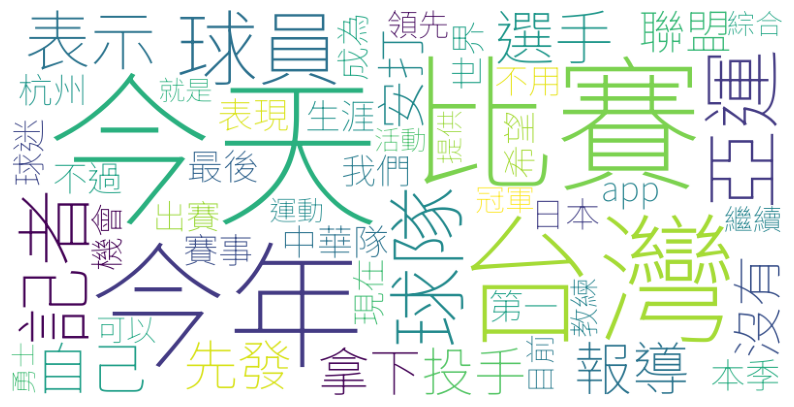

In [61]:
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400,font_path=font_path, max_words = 50)
wordcloud.generate_from_frequencies(freq_dict)

# 設定圖的字體大小
plt.rcParams['font.size'] = 14

# 設定圖的中文字體 (無法顯示的話可以試試‘Microsoft JhengHei’字體)
# 也可參考：https://pyecontech.com/2020/03/27/python_matplotlib_chinese/


# 設定文字雲中文字體路徑

plt.figure(figsize = (10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [62]:
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df.head(10)

,artDate,artTitle,artContent,word
0,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,球王
0,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,喬柯維奇
0,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,novak
0,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,djokovic
0,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,澳洲
0,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,城市
0,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,伯斯
0,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,慶祝
0,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,新年
1,2023-12-31,影》球王喬帥歡度跨年夜 勝利後與澳洲觀眾一起倒數,球王喬柯維奇（Novak Djokovic）在澳洲城市伯斯慶祝新年，幫助塞爾維亞在第2屆聯合...,幫助


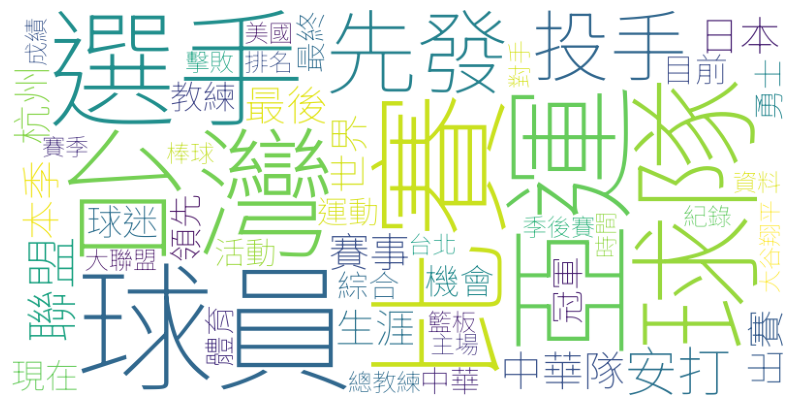

In [63]:
freq_df_nostop = pd.DataFrame(pd.value_counts(noStop_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()
freq_dict_nostop = freq_df_nostop.set_index('word').to_dict()
freq_dict_nostop = freq_dict_nostop['count']

# 繪製文字雲
wordcloud_nostop = WordCloud(background_color = 'white', width = 800, height = 400, font_path = font_path, max_words = 50)
wordcloud_nostop.generate_from_frequencies(freq_dict_nostop)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_nostop)
plt.axis('off')
plt.show()

3.3 不同球團的啦啦隊聲勢分析

球團<==>啦啦隊名稱 :  
- 中信兄弟<==>Passion Sisters   
- 統一7-ELEVENn師<==>Uni Girls  
- 富邦悍將<==>Fubon Angels  
- Rakuten Monkeys<==>Rakuten Girls   
- 味全龍<==> Dragon Beauties  
- 台剛雄鷹<==>WING STARS  

情緒分析

In [64]:
# 讀取情緒字典
liwc_dict = pd.read_csv("./dict/liwc/LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})
liwc_dict.head()

,word,sentiments
0,):,affect
1,3q,affect
2,:(,affect
3,:),affect
4,<3,affect


In [73]:
# tt= noStop_df[.str.contains('棒球',na=False)]
tt = noStop_df[noStop_df['artContent'].astype(str).str.contains('球王', na=False)]
ptt_liwc_df = pd.merge(tt[["artDate", "artTitle", "artContent", "word"]], liwc_dict, how="left")

ptt_liwc_df

,artDate,artTitle,artContent,word,sentiments


## 4. 結論